In [25]:
import pandas as pd
import numpy as np

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import matplotlib.pyplot as plt

%matplotlib inline

In [57]:
def evaluation_metrics(y_true, y_pred, save_name=False):
    
    scores = {'r2': r2_score(y_true, y_pred),
              'rmse': mean_squared_error(y_true, y_pred),
              'mae': mean_absolute_error(y_true, y_pred),
              'mape': mean_absolute_percentage_error(y_true, y_pred)}
    
    if save_name:
        pd.DataFrame(scores, index=[0]).to_csv('../model_scores/%s'%save_name, index=False)
        
    return scores
    
def model_evaluation_plots(x, y_true, y_pred, save_name=False):
    
    fig = plt.figure(figsize=(15,8))
    gs = fig.add_gridspec(2, 2)
    
    fig.add_subplot(gs[0, :])
    plt.plot(x, y_true, label='true')
    plt.plot(x, y_pred, label='pred')
    plt.legend()

    fig.add_subplot(gs[1,0])
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel('true value')
    plt.ylabel('predicted value')
    
    fig.add_subplot(gs[1,1])
    diff = [t-p for t, p in zip(y_true, y_pred)]
    plt.hist(diff, bins=30)
    plt.xlabel('true - pred')
    plt.ylabel('N')
    
    if save_name:
        plt.savefig('../figs/%s.pdf'%save_name)
        plt.savefig('../figs/%s.png'%save_name)
    
    return

### Simulate data for testing

In [40]:

dates = pd.date_range('2020-01-01', periods=100)
y_true = np.random.uniform(size=100)
y_pred = [y+0.1*np.random.normal() for y in y_true]

### Model evaluation

In [54]:
evaluation_metrics(y_true, y_pred, save_name='test.csv')

{'r2': 0.8877290103509435,
 'rmse': 0.009765645148875991,
 'mae': 0.07675425957827313,
 'mape': 1.299460592625479}

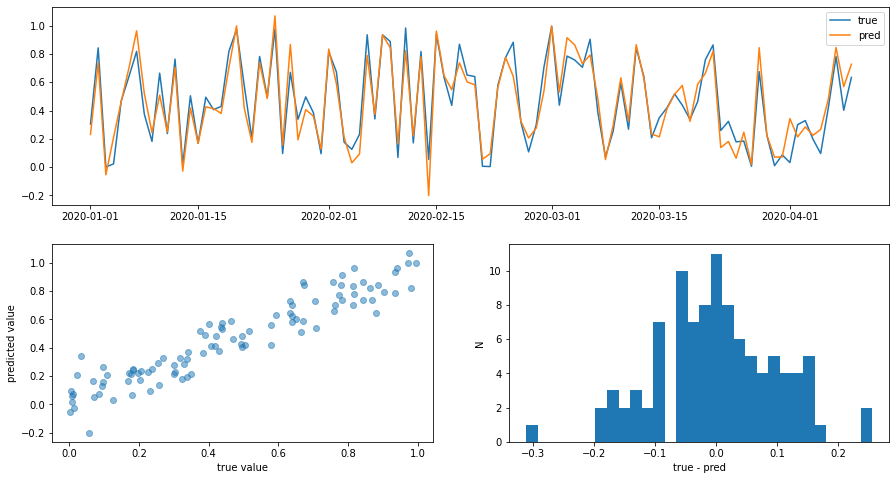

In [56]:
model_evaluation_plots(dates, y_true, y_pred)